# Prerequisites required to running the notebook

A python-jupyter notebook environment is expected along with some basic libraries like `numpy`, `matplotlib` and `random`.

**Discalimer: When running into animation or plotting issues, restart the kernel.**

In [1]:
# required imports
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import random

# Part 1 - Simulated Annealing

Using probabilistic techniques to attempt and find the global minimum of a function.

$$P(\Delta E) = e^{-\frac{\Delta E}{kT}}$$

In [2]:
# Function with many minima
def yfunc(x):
    return x**2 + np.sin(8*x)

In [12]:
def ann(func, starting_point, T, decay):
    # a large number as the bestcost as the initial point
    bestcost = 100000
    # the starting point
    bestx = starting_point
    pathx = []
    pathy = []
    for i in range(1000):
        # an arbitrary step taken randomly
        dx = (np.random.random_sample() - 0.5) * T
        x = bestx + dx
        
        y = func(x)
        # checking whther the step is better or worse
        if y<bestcost:
            bestcost = y
            bestx = x
            pathx.append(x)
            pathy.append(y)
        # if worse then accepting the path with the required probability law
        else:
            # random number between [0, 1]
            toss = np.random.random_sample()
            if toss < np.exp(-(y-bestcost)/T):
                bestcost = y
                bestx = x
                pathx.append(x)
                pathy.append(y)
            pass
        # reducing the value of 'T' as we make progress
        T = T*decay
    
    return pathx, pathy

x1, y1 = ann(yfunc, -2, 4.0, 0.95) # give the mentioned attributes here

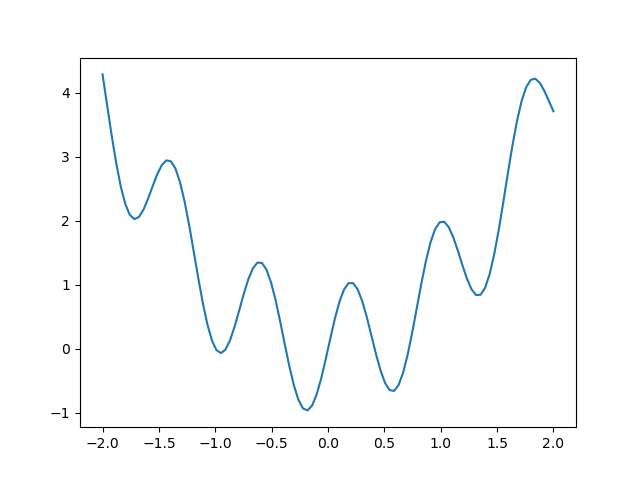

In [13]:
xbase = np.linspace(-2, 2, 100) # specify the plotting range here
ybase = yfunc(xbase)

# set up for animating the path
fig, ax = plt.subplots()
ax.plot(xbase, ybase)
xall, yall = [], []
lnall,  = ax.plot([], [], 'ro')
lngood, = ax.plot([], [], 'go', markersize=10)

# the update function passed into FuncAnimation
def update(frame):
    lngood.set_data(x1[frame], y1[frame])
    xall.append(x1[frame])
    yall.append(y1[frame])
    lnall.set_data(xall, yall)
    
# animating the path
ani= FuncAnimation(fig, update, frames=range(1000), interval=100, repeat=False)
plt.show()

Run this cell once the animation is done.

In [14]:
plt.close(fig)

# Part 2 - Travelling salesman problem

We use a simialar approach as simulated annealing in an attempt to find the global minimum path.

Given a file name, temperature and decay rate, we use SA techniques to try and minimize the path.def dist(x1, y1, x2, y2):
    return pow((x1-x2)**2 + (y1-y2)**2, 0.5)

In [15]:
# custom function to calculate the distence between two points
def dist(x1, y1, x2, y2):
    return pow((x1-x2)**2 + (y1-y2)**2, 0.5)

In [16]:
def tsp(file, T, decay):
    # file reading
    f = open(file, "r")

    q = f.readlines()
    n = int(q[0])
    q = q[1:]
    x = []
    y = []
    
    for i in range(n):
        temp = q[i].split()
        x.append(float(temp[0]))
        y.append(float(temp[1]))
    
    # initalizing the order of the path taken
    current = [i for i in range(len(x))]
    current.append(0)
    
    current_dist = 0
    
    # calculating the current distance
    for i in range(len(x)-1):
        current_dist += dist(x[i], y[i], x[i+1], y[i+1])
    current_dist += dist(x[-1], y[-1], x[0], y[0])
    # runnning the simulated annealing for a fixed number of episodes
    for i in range(100000):
        # swapping any two cities
        sw1 = random.randint(1, len(x)-1)
        sw2 = random.randint(1, len(x)-1)
        while True:
            if sw1 != sw2:
                break
            else:
                sw2 = random.randint(1, len(x)-1)
        
        # calculating the new distance once the swap is perfromed
        new_dist = current_dist
        if sw1 == sw2 + 1:
            new_dist -= dist(x[current[sw1]], y[current[sw1]], x[current[sw1+1]], y[current[sw1+1]])
            new_dist -= dist(x[current[sw2]], y[current[sw2]], x[current[sw2-1]], y[current[sw2-1]])
            new_dist += dist(x[current[sw2]], y[current[sw2]], x[current[sw1+1]], y[current[sw1+1]])
            new_dist += dist(x[current[sw1]], y[current[sw1]], x[current[sw2-1]], y[current[sw2-1]])
        elif sw2 == sw1 + 1:
            new_dist -= dist(x[current[sw1]], y[current[sw1]], x[current[sw1-1]], y[current[sw1-1]])
            new_dist -= dist(x[current[sw2]], y[current[sw2]], x[current[sw2+1]], y[current[sw2+1]])
            new_dist += dist(x[current[sw1]], y[current[sw1]], x[current[sw2+1]], y[current[sw2+1]])
            new_dist += dist(x[current[sw2]], y[current[sw2]], x[current[sw1-1]], y[current[sw1-1]])
        else:
            new_dist -= dist(x[current[sw1]], y[current[sw1]], x[current[sw1+1]], y[current[sw1+1]])
            new_dist -= dist(x[current[sw1]], y[current[sw1]], x[current[sw1-1]], y[current[sw1-1]])
            new_dist -= dist(x[current[sw2]], y[current[sw2]], x[current[sw2+1]], y[current[sw2+1]])
            new_dist -= dist(x[current[sw2]], y[current[sw2]], x[current[sw2-1]], y[current[sw2-1]])
            
            new_dist += dist(x[current[sw1]], y[current[sw1]], x[current[sw2+1]], y[current[sw2+1]])
            new_dist += dist(x[current[sw1]], y[current[sw1]], x[current[sw2-1]], y[current[sw2-1]])
            new_dist += dist(x[current[sw2]], y[current[sw2]], x[current[sw1-1]], y[current[sw1-1]])
            new_dist += dist(x[current[sw2]], y[current[sw2]], x[current[sw1+1]], y[current[sw1+1]])
            
        # if the new distance is smaller perform the swap
        if new_dist < current_dist:
            current_dist = new_dist
            a = current[sw1]
            current[sw1] = current[sw2]
            current[sw2] = a
        # else probabilistically choose whether to swap or not based on SA equation
        else:
            toss = np.random.random_sample()
            if toss < np.exp(-(new_dist-current_dist)/T):
                current_dist = new_dist
                a = current[sw1]
                current[sw1] = current[sw2]
                current[sw2] = a
            pass
        # update the T based on decay
        T = T*decay
        
    print(f"The distance travelled = {current_dist}")
    
    # for plotting the the path travelled
    xplot = []
    yplot = []
    for i in range(len(current)-1):
        xplot.append(x[i])
        yplot.append(y[i])
    xplot.append(x[0])
    yplot.append(y[0])
    
    plt.plot(xplot, yplot, 'black')
    plt.plot(xplot, yplot, 'rs')
    plt.show()

The distance travelled = 34.076561394636684


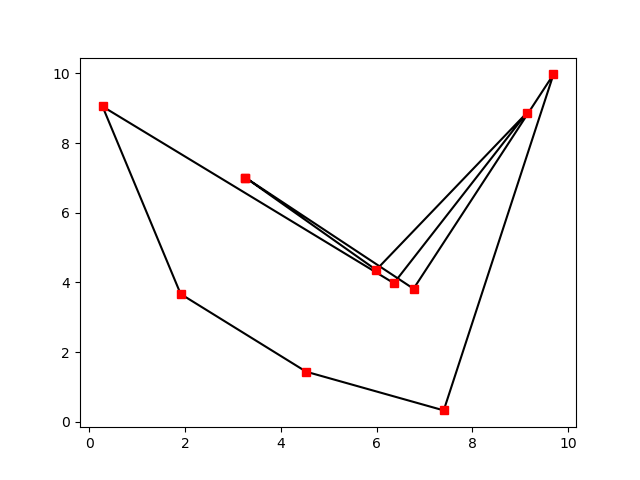

In [21]:
tsp("tsp_10.txt", 7.0, 0.95)

In [22]:
plt.close()

The distance travelled = 131.4714942033006


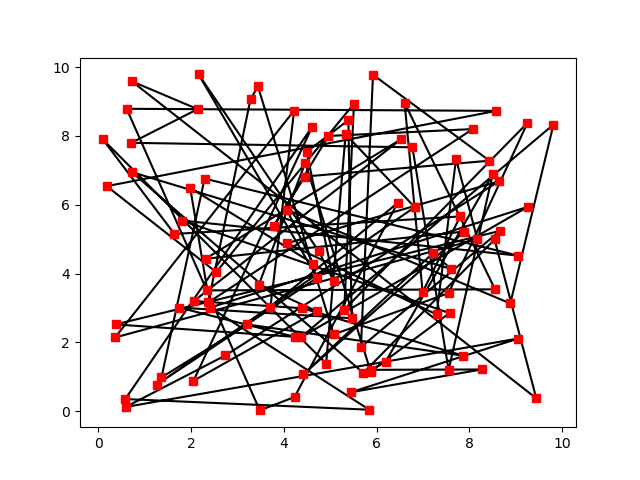

In [25]:
tsp("tsp_100.txt", 8.0, 0.95)

In [26]:
plt.close()

## Antoher approach to Travelling Salesman Problem

Here we run through every possible permutation ((n-1)! for n cities), and calculate the minimum distance travelled accordingly.

Note: This appraoch is very time consuming and not feasible for more than 10 cities.

In [27]:
f = open("tsp_10.txt", "r")

x = f.readlines()
n = int(x[0])
x = x[1:]
xcoord = []
ycoord = []

for i in range(n):
    temp = x[i].split()
    xcoord.append(float(temp[0]))
    ycoord.append(float(temp[1]))
    
def dist(x1, y1, x2, y2):
    return pow((x1-x2)**2 + (y1-y2)**2, 0.5)

graph = []
    
for i in range(n):
    graph.append([])
    for j in range(n):
        graph[i].append(dist(xcoord[i], ycoord[i], xcoord[j], ycoord[j]))
        
# print(graph)

f.close()

In [28]:
from sys import maxsize
from itertools import permutations

def travellingSalesmanProblem(graph):
 
    # store all vertex apart from source vertex
    a = []
    for i in range(1, n):
        a.append(i)
 
    # the updation of minimum path based on the route taken
    min_path = maxsize
    next_permutation=permutations(a) # getting a list of all possible permutations
    for i in next_permutation:
 
        # the current path's distance
        current_path = 0
 
        # compute current path
        k = 0
        for j in i:
            current_path += graph[k][j]
            k = j
        current_path += graph[k][0]
 
        # update minimum
        min_path = min(min_path, current_path)
         
    return min_path

print(f"This is the distance travelled by taking the minimum possible path = {travellingSalesmanProblem(graph)}")

This is the distance travelled by taking the minimum possible path = 34.07656139463668
